In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Flatten,InputLayer
import keras
import imageio.v2 as imageio
from PIL import Image 

In [2]:
train = pd.read_csv('/Users/sukhmanpreetsingh/Documents/agedetectiontrain/train.csv')
test = pd.read_csv('/Users/sukhmanpreetsingh/Documents/agedetectiontest/test.csv')

Age group :  MIDDLE


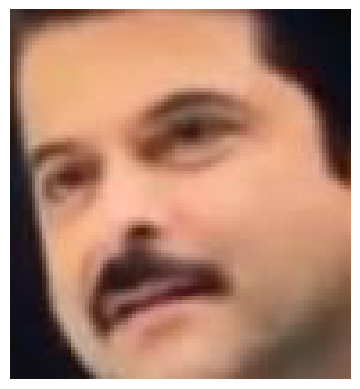

In [3]:
np.random.seed(10)
idx = np.random.choice(train.index)
img_name = train.ID[idx]
img = imageio.imread(os.path.join('/Users/sukhmanpreetsingh/Documents/agedetectiontrain/Train',img_name))
print('Age group : ',train.Class[idx])
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
temp = []
for img_name in train.ID:
    img_path = os.path.join('/Users/sukhmanpreetsingh/Documents/agedetectiontrain/Train',img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32,32))).astype('float32')
    temp.append(img)
train_x = np.stack(temp)

In [5]:
temp = []
for img_name in test.ID:
    img_path = os.path.join('/Users/sukhmanpreetsingh/Documents/agedetectiontest/Test',img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32,32))).astype('float32')
    temp.append(img)
test_x = np.stack(temp)

In [6]:
train_x = train_x / 255
test_x = test_x / 255

In [7]:
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = to_categorical(train_y)

In [8]:
input_num_units = (32,32,3)
hidden_num_units = 500
output_num_units = 3
epochs = 5
batch_size = 128

In [10]:
model = Sequential([
    InputLayer(shape = input_num_units),
    Flatten(),
    Dense(units = hidden_num_units,activation = 'relu'),
    Dense(units = output_num_units,activation = 'softmax')
])

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │     1,536,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,538,003 (5.87 MB)

 Trainable params: 1,538,003 (5.87 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer = 'sgd',
             loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [14]:
model.fit(train_x,train_y,batch_size = batch_size,epochs = epochs,verbose = 1)

Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5345 - loss: 0.9476
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5982 - loss: 0.8584
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6125 - loss: 0.8285
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6193 - loss: 0.8181
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6293 - loss: 0.8018


In [15]:
model.fit(train_x,train_y,batch_size = batch_size,epochs = epochs,verbose = 1,validation_split = 0.2)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6372 - loss: 0.7969 - val_accuracy: 0.6331 - val_loss: 0.8000
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6323 - loss: 0.7984 - val_accuracy: 0.6025 - val_loss: 0.8335
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6287 - loss: 0.8040 - val_accuracy: 0.6502 - val_loss: 0.7732
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6385 - loss: 0.7832 - val_accuracy: 0.6258 - val_loss: 0.8071
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6464 - loss: 0.7787 - val_accuracy: 0.6251 - val_loss: 0.8125


In [17]:
pred_prob = model.predict(test_x)  # Gives probabilities
pred = np.argmax(pred_prob, axis=1)  
pred = lb.inverse_transform(pred)
test['Class'] = pred
test.to_csv('out.csv',index = False)

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Original : MIDDLE Predicted : YOUNG


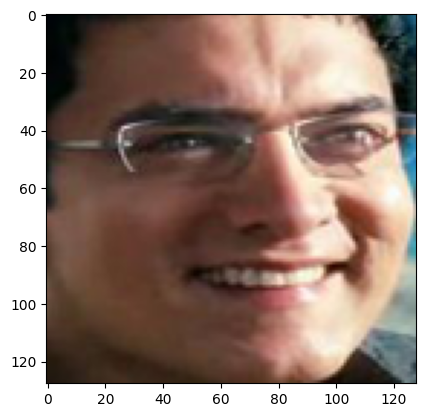

In [19]:
idx = 2481
img_name = test.ID[idx]
img = imageio.imread(os.path.join('/Users/sukhmanpreetsingh/Documents/agedetectiontest/Test',img_name))
plt.imshow(np.array(Image.fromarray(img).resize((128,128))))
pred_prob = model.predict(test_x)  # Gives probabilities
pred = np.argmax(pred_prob, axis=1)  
print('Original :', train.Class[idx], 'Predicted :', lb.inverse_transform([pred[idx]])[0])